In [12]:
import numpy as np
import pandas as pd

In [13]:
churn_data = pd.read_csv(r'C:\Documents\DS Bootcamp\Projekt\Data\Telecom_customer churn.csv')
churn_data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [101]:
desc = churn_data.describe()


In [120]:
# desc = desc.loc[desc.min == 0.0:,]
# desc

In [15]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
rev_Mean            99643 non-null float64
mou_Mean            99643 non-null float64
totmrc_Mean         99643 non-null float64
da_Mean             99643 non-null float64
ovrmou_Mean         99643 non-null float64
ovrrev_Mean         99643 non-null float64
vceovr_Mean         99643 non-null float64
datovr_Mean         99643 non-null float64
roam_Mean           99643 non-null float64
change_mou          99109 non-null float64
change_rev          99109 non-null float64
drop_vce_Mean       100000 non-null float64
drop_dat_Mean       100000 non-null float64
blck_vce_Mean       100000 non-null float64
blck_dat_Mean       100000 non-null float64
unan_vce_Mean       100000 non-null float64
unan_dat_Mean       100000 non-null float64
plcd_vce_Mean       100000 non-null float64
plcd_dat_Mean       100000 non-null float64
recv_vce_Mean       100000 non-null float64
recv_sms_Mean       

In [16]:
cols = pd.read_csv('C:\Documents\DS Bootcamp\Projekt\Data\Telecom_customer churn columns.csv', header=None)


In [123]:
columns_tab = pd.DataFrame(columns=["Data_type", "Column_name", "Column_description"])

In [124]:
#every third row corrsponds with column names in columns_tab
columns_tab.Data_type = pd.Series(cols[0][cols.index%3==0].values)
columns_tab.Column_name = pd.Series(cols[0][cols.index%3==1].values)
columns_tab.Column_description = pd.Series(cols[0][cols.index%3==2].values)
columns_tab

,Data_type,Column_name,Column_description
0,Numeric,rev_Mean,Mean monthly revenue (charge amount)
1,Numeric,mou_Mean,Mean number of monthly minutes of use
2,Numeric,totmrc_Mean,Mean total monthly recurring charge
3,Numeric,da_Mean,Mean number of directory assisted calls
4,Numeric,ovrmou_Mean,Mean overage minutes of use
5,Numeric,ovrrev_Mean,Mean overage revenue
6,Numeric,vceovr_Mean,Mean revenue of voice overage
7,Numeric,datovr_Mean,Mean revenue of data overage
8,Numeric,roam_Mean,Mean number of roaming calls
9,Numeric,change_mou,Percentage change in monthly minutes of use vs...


## Data analysis

There are 100 variables in the Dataset. It would be nice to determine if the data make sanse in terms of further churn prediction. Let's start with missing values and outliers.
Charts and statistict seem to be the best ways to start with

Values definitly need to be scaled


In [19]:
nan_info = pd.DataFrame(columns=["Column_name", "Sum_NaN", "NaN_ratio", "Data_type"], data=[[x, churn_data[x].isna().sum(), (churn_data[x].isna().sum() / len(churn_data[x]) * 100), churn_data[x].dtypes] for x in churn_data.columns])
# nan_info.sort_values(by=["NaN_ratio"], ascending=False)

In [20]:
# yes, I know I could use info() method, but following solution but the following is more readable
data_stats = pd.merge(left=nan_info, right=columns_tab, left_on=["Column_name"], right_on=["Column_name"]).sort_values(by=["NaN_ratio"], ascending=False)
data_stats[data_stats["NaN_ratio"]>20]
# data_stats[data_stats["Column_name"]=="churn"]

,Column_name,Sum_NaN,NaN_ratio,Data_type_x,Data_type_y,Column_description
87,numbcars,49366,49.366,float64,Numeric,Known number of vehicles
89,dwllsize,38308,38.308,object,String,Dwelling size
88,HHstatin,37923,37.923,object,String,Premier household status indicator
80,ownrent,33706,33.706,object,String,Home owner/renter status
82,dwlltype,31909,31.909,object,String,Dwelling Unit type
81,lor,30190,30.190,float64,Numeric,Length of residence
86,income,25436,25.436,float64,Numeric,Estimated income
84,adults,23019,23.019,float64,Numeric,Number of adults in household
85,infobase,22079,22.079,object,String,InfoBase match


Not bad as it goes for missing data :) There are though variables where more than 20% of data are missing, but never more than a half. Let's do the following:
1. In the first solution we'll try to impute the missing data (mean for numbers and most common for categorical)
2. In the second solution we'll remove all variables, where more than 20% of data are missing. All other will be imputed the same way as mentioned above

Now let's look at some charts to find any outliers... 

In [29]:
import seaborn as sns

In [95]:
float_cols = churn_data.dtypes == 'float64'
first_20 = churn_data.loc[:, float_cols].iloc[:,20:40]
first_20.head()

,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean
0,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000
1,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000
2,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000
3,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667
4,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333


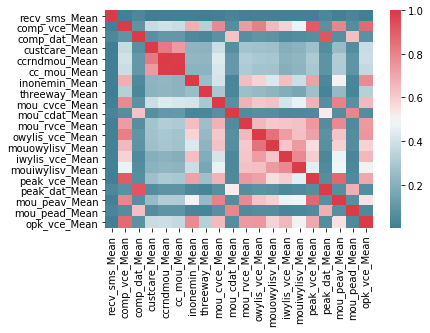

In [96]:
corr = first_20.corr()
corr
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [150]:
columns_tab[columns_tab["Column_name"]=="rev_Mean"].iloc[0]["Column_description"]

'Mean monthly revenue (charge amount)'

Mean monthly revenue (charge amount)


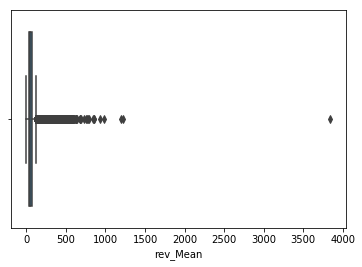

Mean number of monthly minutes of use


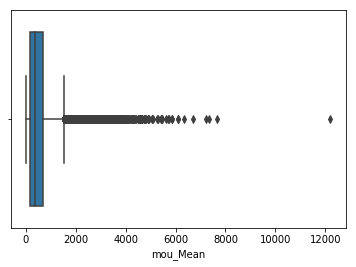

Mean total monthly recurring charge


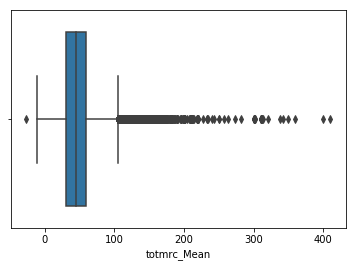

Mean number of directory assisted calls


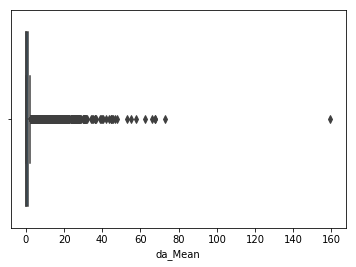

Mean overage minutes of use


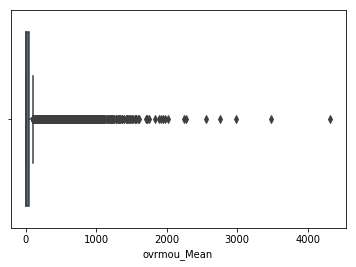

Mean overage revenue


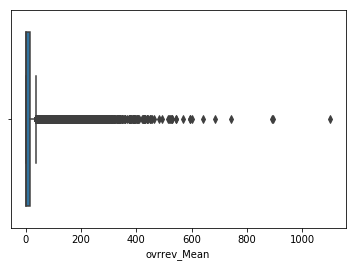

Mean revenue of voice overage 


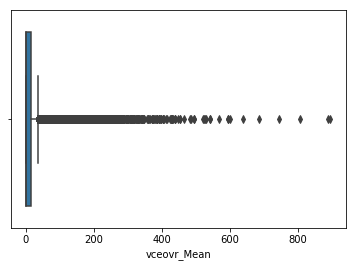

 Mean revenue of data overage


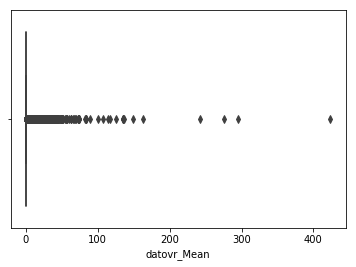

Mean number of roaming calls


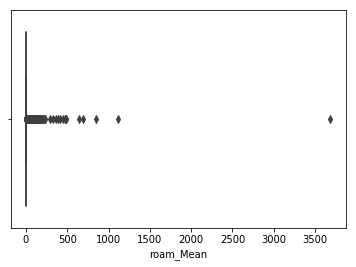

Percentage change in monthly minutes of use vs previous three month average


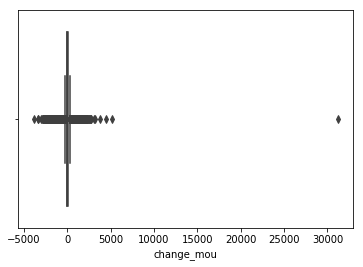

 Percentage change in monthly revenue vs previous three month average


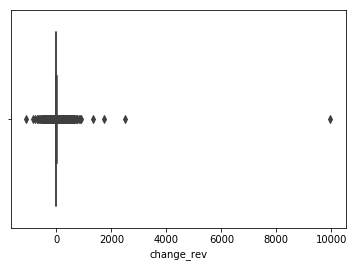

 Mean number of dropped (failed) voice calls


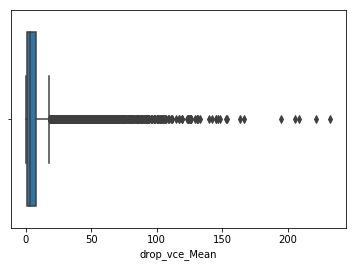

Mean number of dropped (failed) data calls


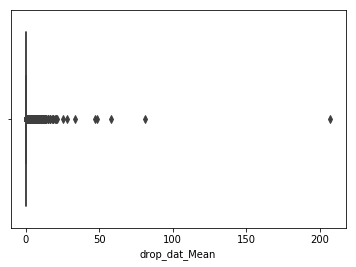

Mean number of blocked (failed) voice calls


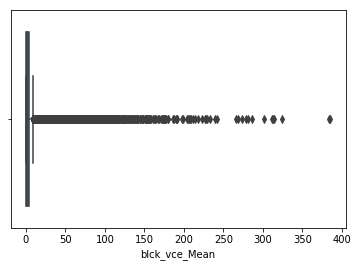

Mean number of blocked (failed) data calls


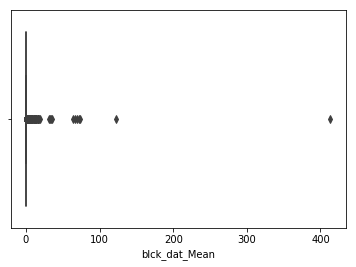

Mean number of unanswered voice calls


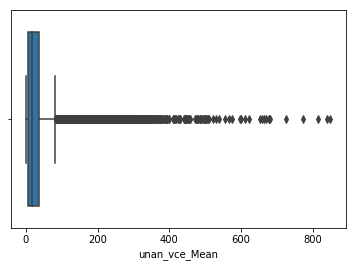

Mean number of unanswered data calls


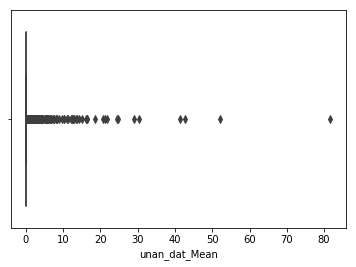

Mean number of attempted voice calls placed


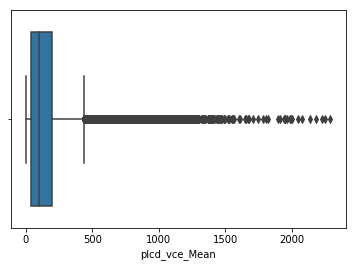

Mean number of attempted data calls placed


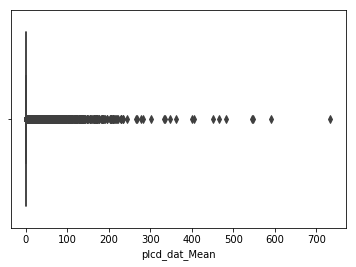

Mean number of received voice calls


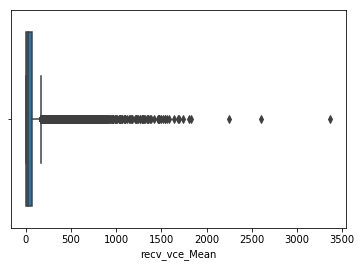

 N


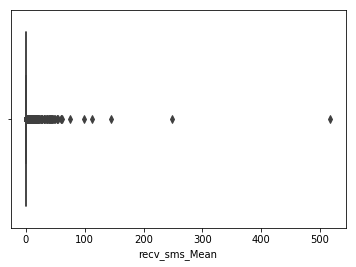

Mean number of completed voice calls


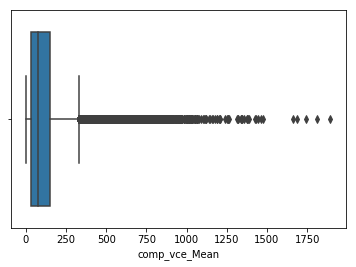

Mean number of completed data calls 


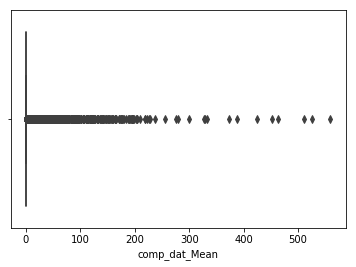

Mean number of customer care calls


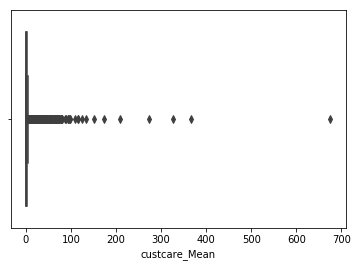

Mean rounded minutes of use of customer care calls


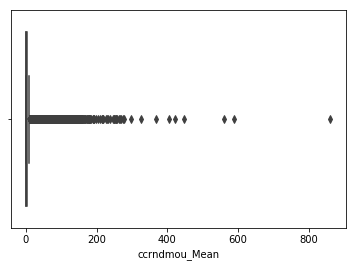

Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls


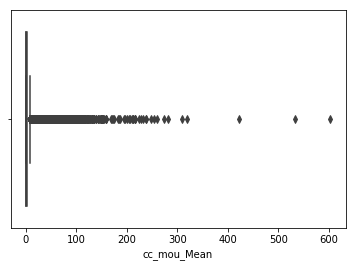

Mean number of inbound calls less than one minute


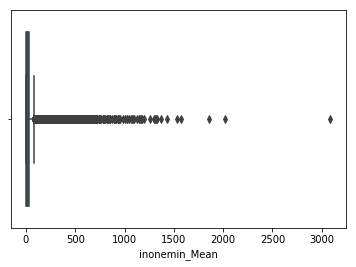

Mean number of three way calls 


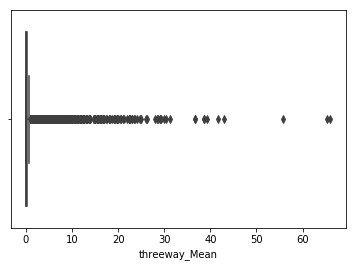

Mean unrounded minutes of use of completed voice calls


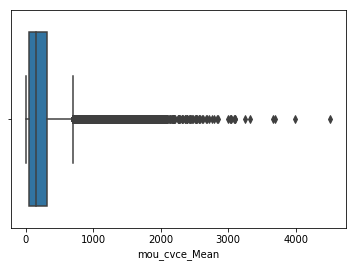

Mean unrounded minutes of use of completed data calls


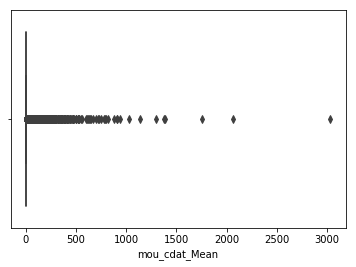

Mean unrounded minutes of use of received voice calls 


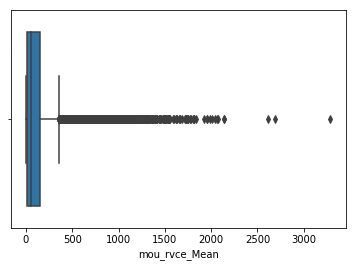

Mean number of outbound wireless to wireless voice calls 


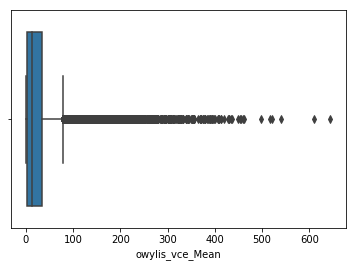

Mean unrounded minutes of use of outbound wireless to wireless voice calls


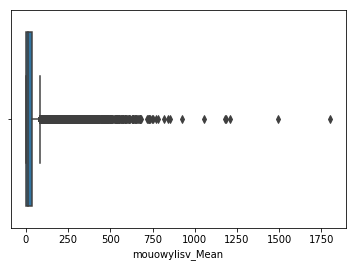

 N


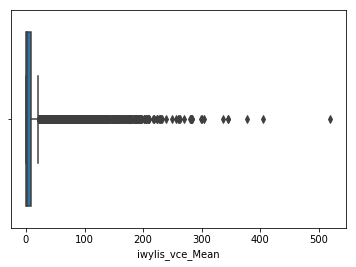

Mean unrounded minutes of use of inbound wireless to wireless voice calls


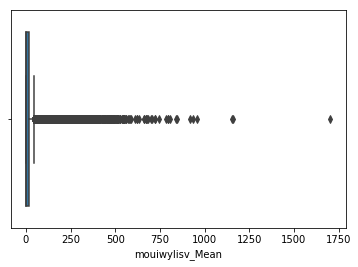

Mean number of inbound and outbound peak voice calls


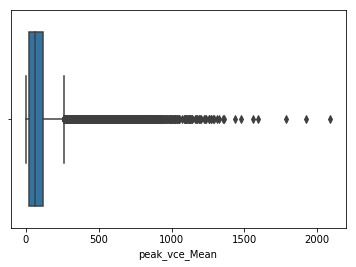

Mean number of peak data calls


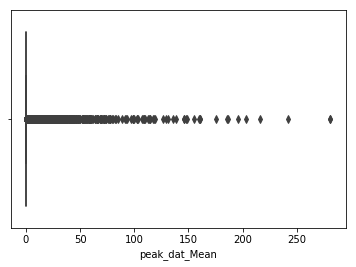

Mean unrounded minutes of use of peak voice calls


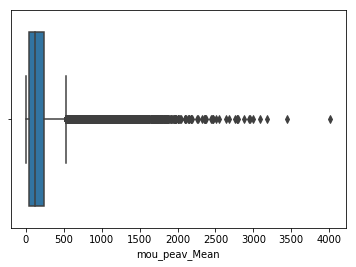

Mean unrounded minutes of use of peak data calls


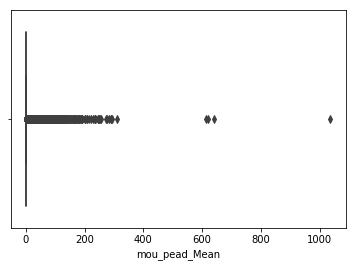

Mean number of off-peak voice calls


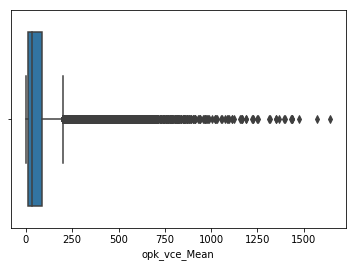

Mean number of off-peak data calls


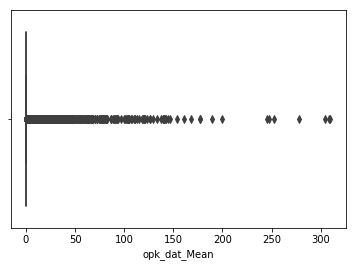

Mean unrounded minutes of use of off-peak voice calls


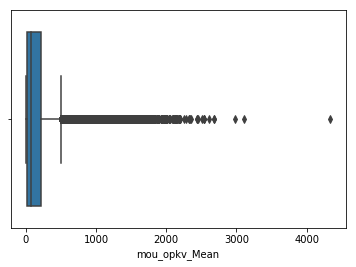

Mean unrounded minutes of use of off-peak data calls


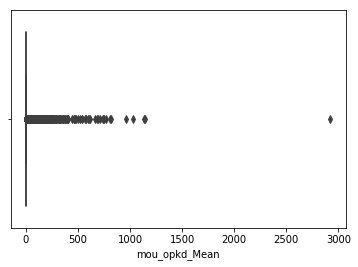

Mean number of dropped or blocked calls


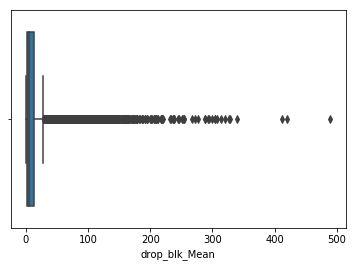

Mean number of attempted calls 


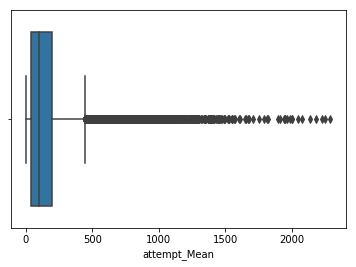

Mean number of completed calls


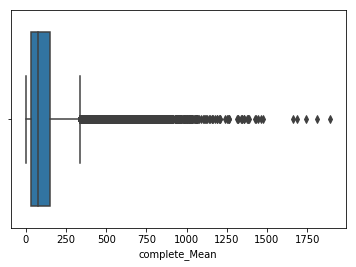

 Mean number of call forwarding calls 


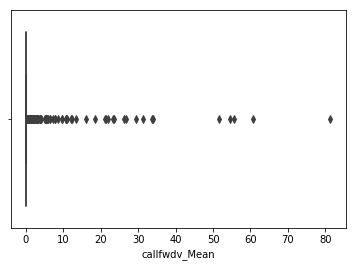

Mean number of call waiting calls


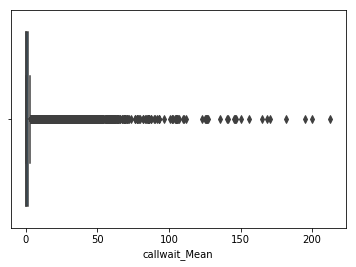

Total minutes of use over the life of the customer


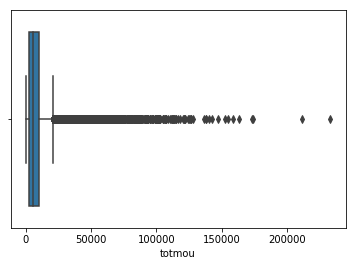

Total revenue


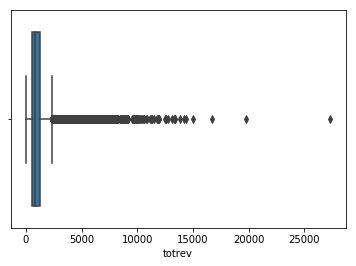

Billing adjusted total revenue over the life of the customer


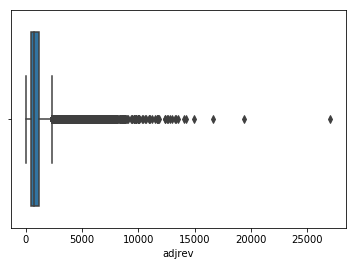

Billing adjusted total minutes of use over the life of the customer


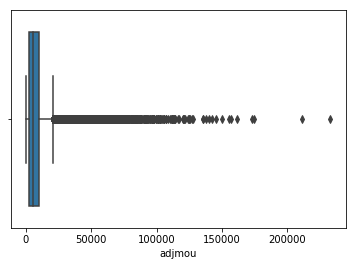

Average monthly revenue over the life of the customer


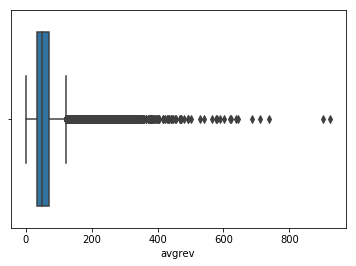

Average monthly minutes of use over the life of the customer


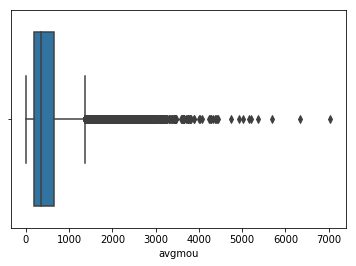

Average monthly number of calls over the life of the customer


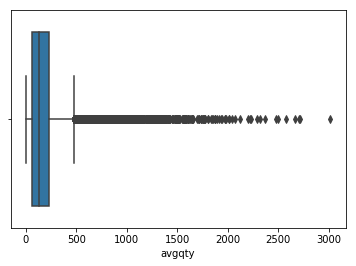

Average monthly minutes of use over the previous six months


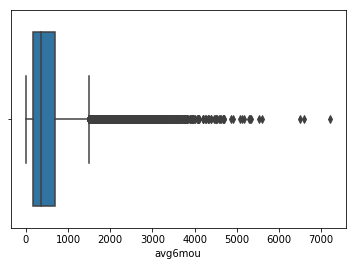

Average monthly number of calls over the previous six months


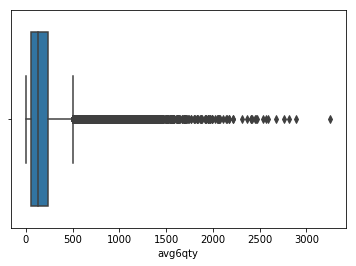

Average monthly revenue over the previous six months 


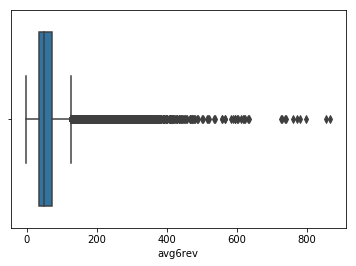

Current handset price


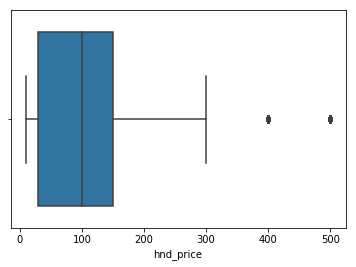

 Number of handsets issued


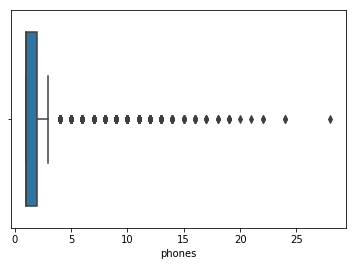

Number of models issued


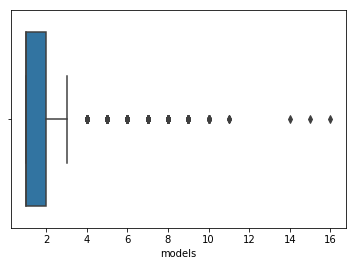

Truck indicator 


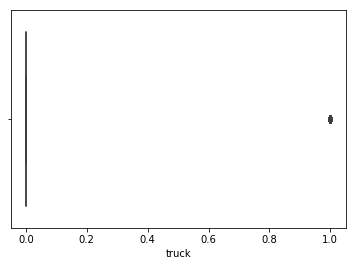

RV indicator


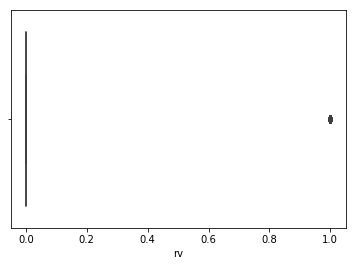

Length of residence


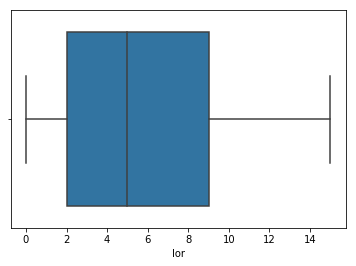

Number of adults in household


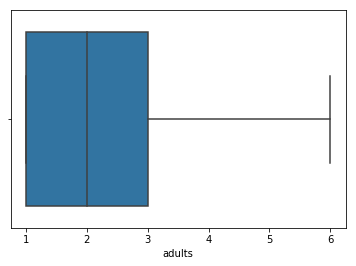

Estimated income


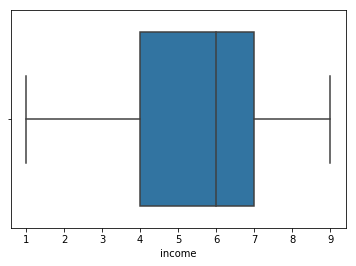

Known number of vehicles


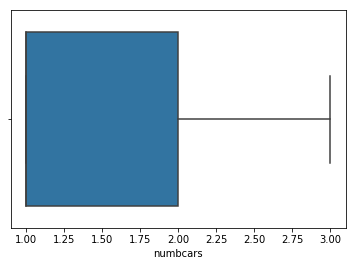

Foreign travel dummy variable


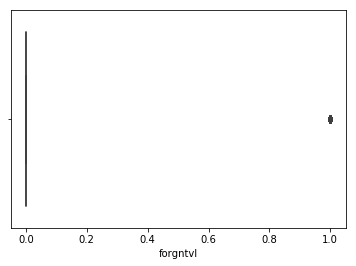

Number of days (age) of current equipment


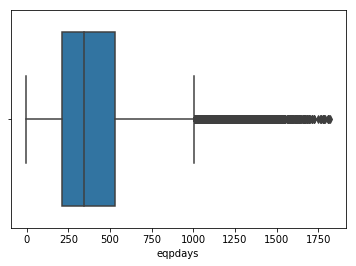

In [152]:
from matplotlib import pyplot as plt
for col in churn_data.loc[:, float_cols]:
#     print(columns_tab[col].str())
    print(columns_tab[columns_tab["Column_name"]==col].iloc[0]["Column_description"])
    sns.boxplot(x=churn_data[col])
    plt.show()